In [1]:
import numpy as np
import pandas as pd
import panel as pn
import datashader as ds
from numba import jit
from datashader import transfer_functions as tf

In [26]:
# Symmetric Icon Attractor
@jit(nopython=True)
def Attractor_Calc(x0, y0, n, a, b, c, d, e, f):
    
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    
    for i in np.arange(n-1):
        
        Alpha, Beta = x[i], y[i]
    
        for j in range(1, f-1):
            Alpha,  Beta = Alpha * x[i] - Beta * y[i],  Beta * x[i] + Alpha * y[i]
            
        Gamma = (a * (x[i]**2 + y[i]**2) + e) + b * (Alpha * x[i] - Beta * y[i])
        
        x[i+1] = Gamma * x[i] - d * y[i] + c * Alpha 
        y[i+1] = d * x[i] + Gamma * y[i] - c * Beta
    
    return x, y

In [27]:
def Attractor_Plot(n=10000000, a=1.8, b=0.0, c=1.0, d=0.1, e=-1.93, f=5, cmap=["gold", "red"]):

    x0, y0 =0.01, 0.01
    cvs = ds.Canvas(plot_width=700, plot_height=700)
    
    x, y = Attractor_Calc(x0, y0, n, a, b, c, d, e, f)
    agg = cvs.points(pd.DataFrame({"x":x, "y":y}), "x", "y")
    
    return tf.shade(agg, cmap)

Column
    [0] Column
        [0] IntSlider(end=10000000, name='n', start=1, value=10000000)
        [1] FloatSlider(end=5.4, name='a', start=-1.8, value=1.8)
        [2] FloatSlider(end=1.0, name='b', start=0.0, value=0.0)
        [3] FloatSlider(end=3.0, name='c', start=-1.0, value=1.0)
        [4] FloatSlider(end=0.30000000000000004, name='d', start=-0.1, value=0.1)
        [5] FloatSlider(end=1.93, name='e', start=-5.79, value=-1.93)
        [6] IntSlider(end=15, name='f', start=-5, value=5)
    [1] Row
        [0] PNG(Image, name='interactive00214')
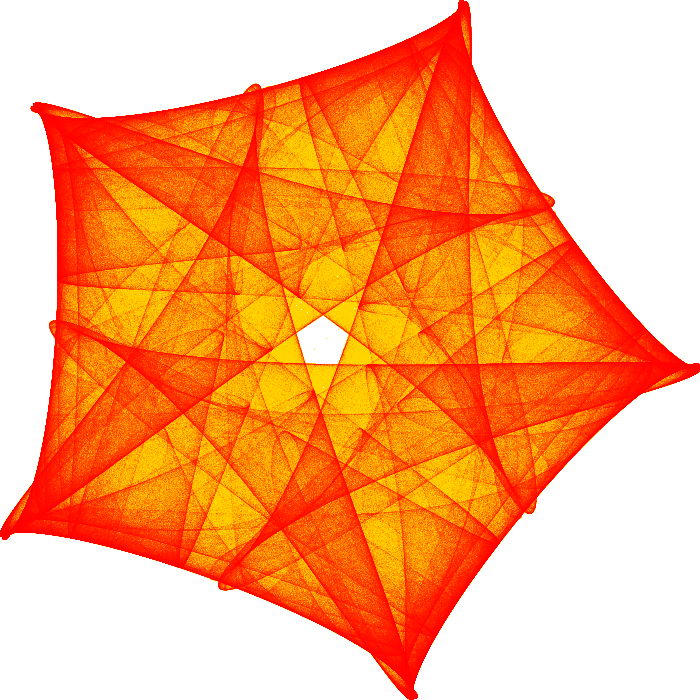

In [28]:
pn.extension()
pn.interact(Attractor_Plot, n=(1, 10000000))